In [26]:
# === 1. Project Setup and Data Loading ===

# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

# Load the dataset
file_path = '../data/telco_churn.csv'
try:
    df_churn = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: The file {file_path} was not found. Please ensure the dataset is in the 'data' folder.")

# Display the first few rows and the shape of the dataframe
print("Dataset Shape:", df_churn.shape)
print("\nFirst 5 rows of the dataset:")
df_churn.head()

Dataset Shape: (7043, 21)

First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
# === 2. Initial Data Inspection ===

# Get a concise summary of the dataframe
print("Dataset Information:")
df_churn.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

## 3. Exploratory Data Analysis (EDA) - Focused on Churn

Before building any model, it's crucial to understand the data. Our primary goal in this EDA is to identify which customer attributes are most strongly associated with churn.

Overall Churn Rate: 26.54%

Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


C:\Users\SGV\AppData\Local\Temp\ipykernel_3340\3021000803.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_churn, palette='viridis')


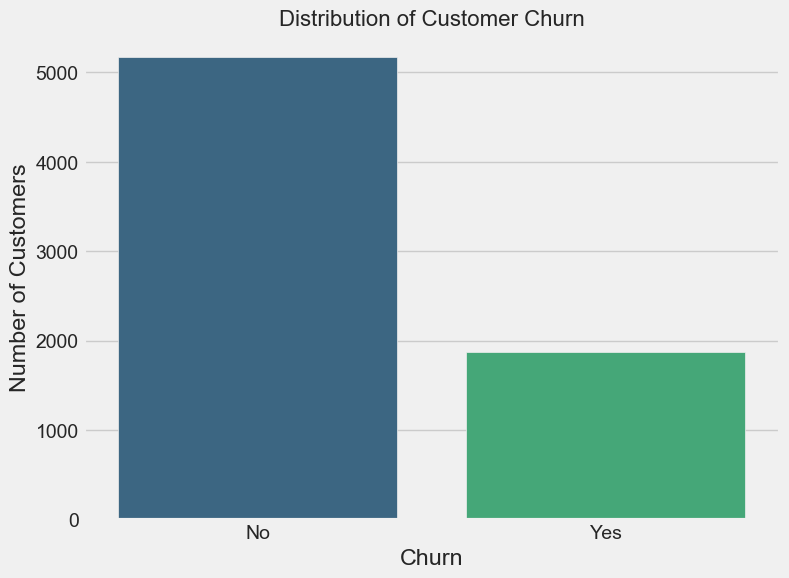

In [28]:
# === 3.1. Analyzing the Target Variable: Churn ===

# Calculate the distribution of the 'Churn' column
churn_distribution = df_churn['Churn'].value_counts()
churn_rate = (churn_distribution['Yes'] / df_churn.shape[0]) * 100

print(f"Overall Churn Rate: {churn_rate:.2f}%")
print(f"\nDistribution:\n{churn_distribution}")

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df_churn, palette='viridis')
plt.title('Distribution of Customer Churn', fontsize=16)
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

## 4. Data Cleaning and Preprocessing

Before diving deeper into EDA and modeling, we need to clean the data. This involves correcting data types and removing irrelevant columns.

In [29]:
# === 4.1. Data Cleaning ===

# Drop the customerID column as it is just an identifier and adds no value to the model
df_cleaned = df_churn.drop('customerID', axis=1)

# --- Correcting the 'TotalCharges' column ---
# Convert 'TotalCharges' to a numeric type.
# The 'errors='coerce'' argument will replace any values that can't be converted with NaN (Not a Number).
df_cleaned['TotalCharges'] = pd.to_numeric(df_cleaned['TotalCharges'], errors='coerce')

# Check for any new missing values created by the conversion
print(f"Number of missing values in TotalCharges after conversion: {df_cleaned['TotalCharges'].isnull().sum()}")

# For the few missing values, a simple strategy is to impute them with the median of the column.
# The median is more robust to outliers than the mean.
median_total_charges = df_cleaned['TotalCharges'].median()
df_cleaned['TotalCharges'].fillna(median_total_charges, inplace=True)

# Verify that there are no more missing values
print(f"Number of missing values in TotalCharges after imputation: {df_cleaned['TotalCharges'].isnull().sum()}")

# Finally, let's map the target variable 'Churn' to numeric values (0 for 'No', 1 for 'Yes')
# This is necessary for most machine learning algorithms.
df_cleaned['Churn'] = df_cleaned['Churn'].map({'No': 0, 'Yes': 1})

print("\nData types after cleaning:")
df_cleaned.info()

Number of missing values in TotalCharges after conversion: 11
Number of missing values in TotalCharges after imputation: 0

Data types after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null 

C:\Users\SGV\AppData\Local\Temp\ipykernel_3340\4001911486.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['TotalCharges'].fillna(median_total_charges, inplace=True)


### 4.2. Visual EDA: Analyzing Churn Across Different Features

Now, let's visualize the churn rate across various categorical features to identify potential predictors.

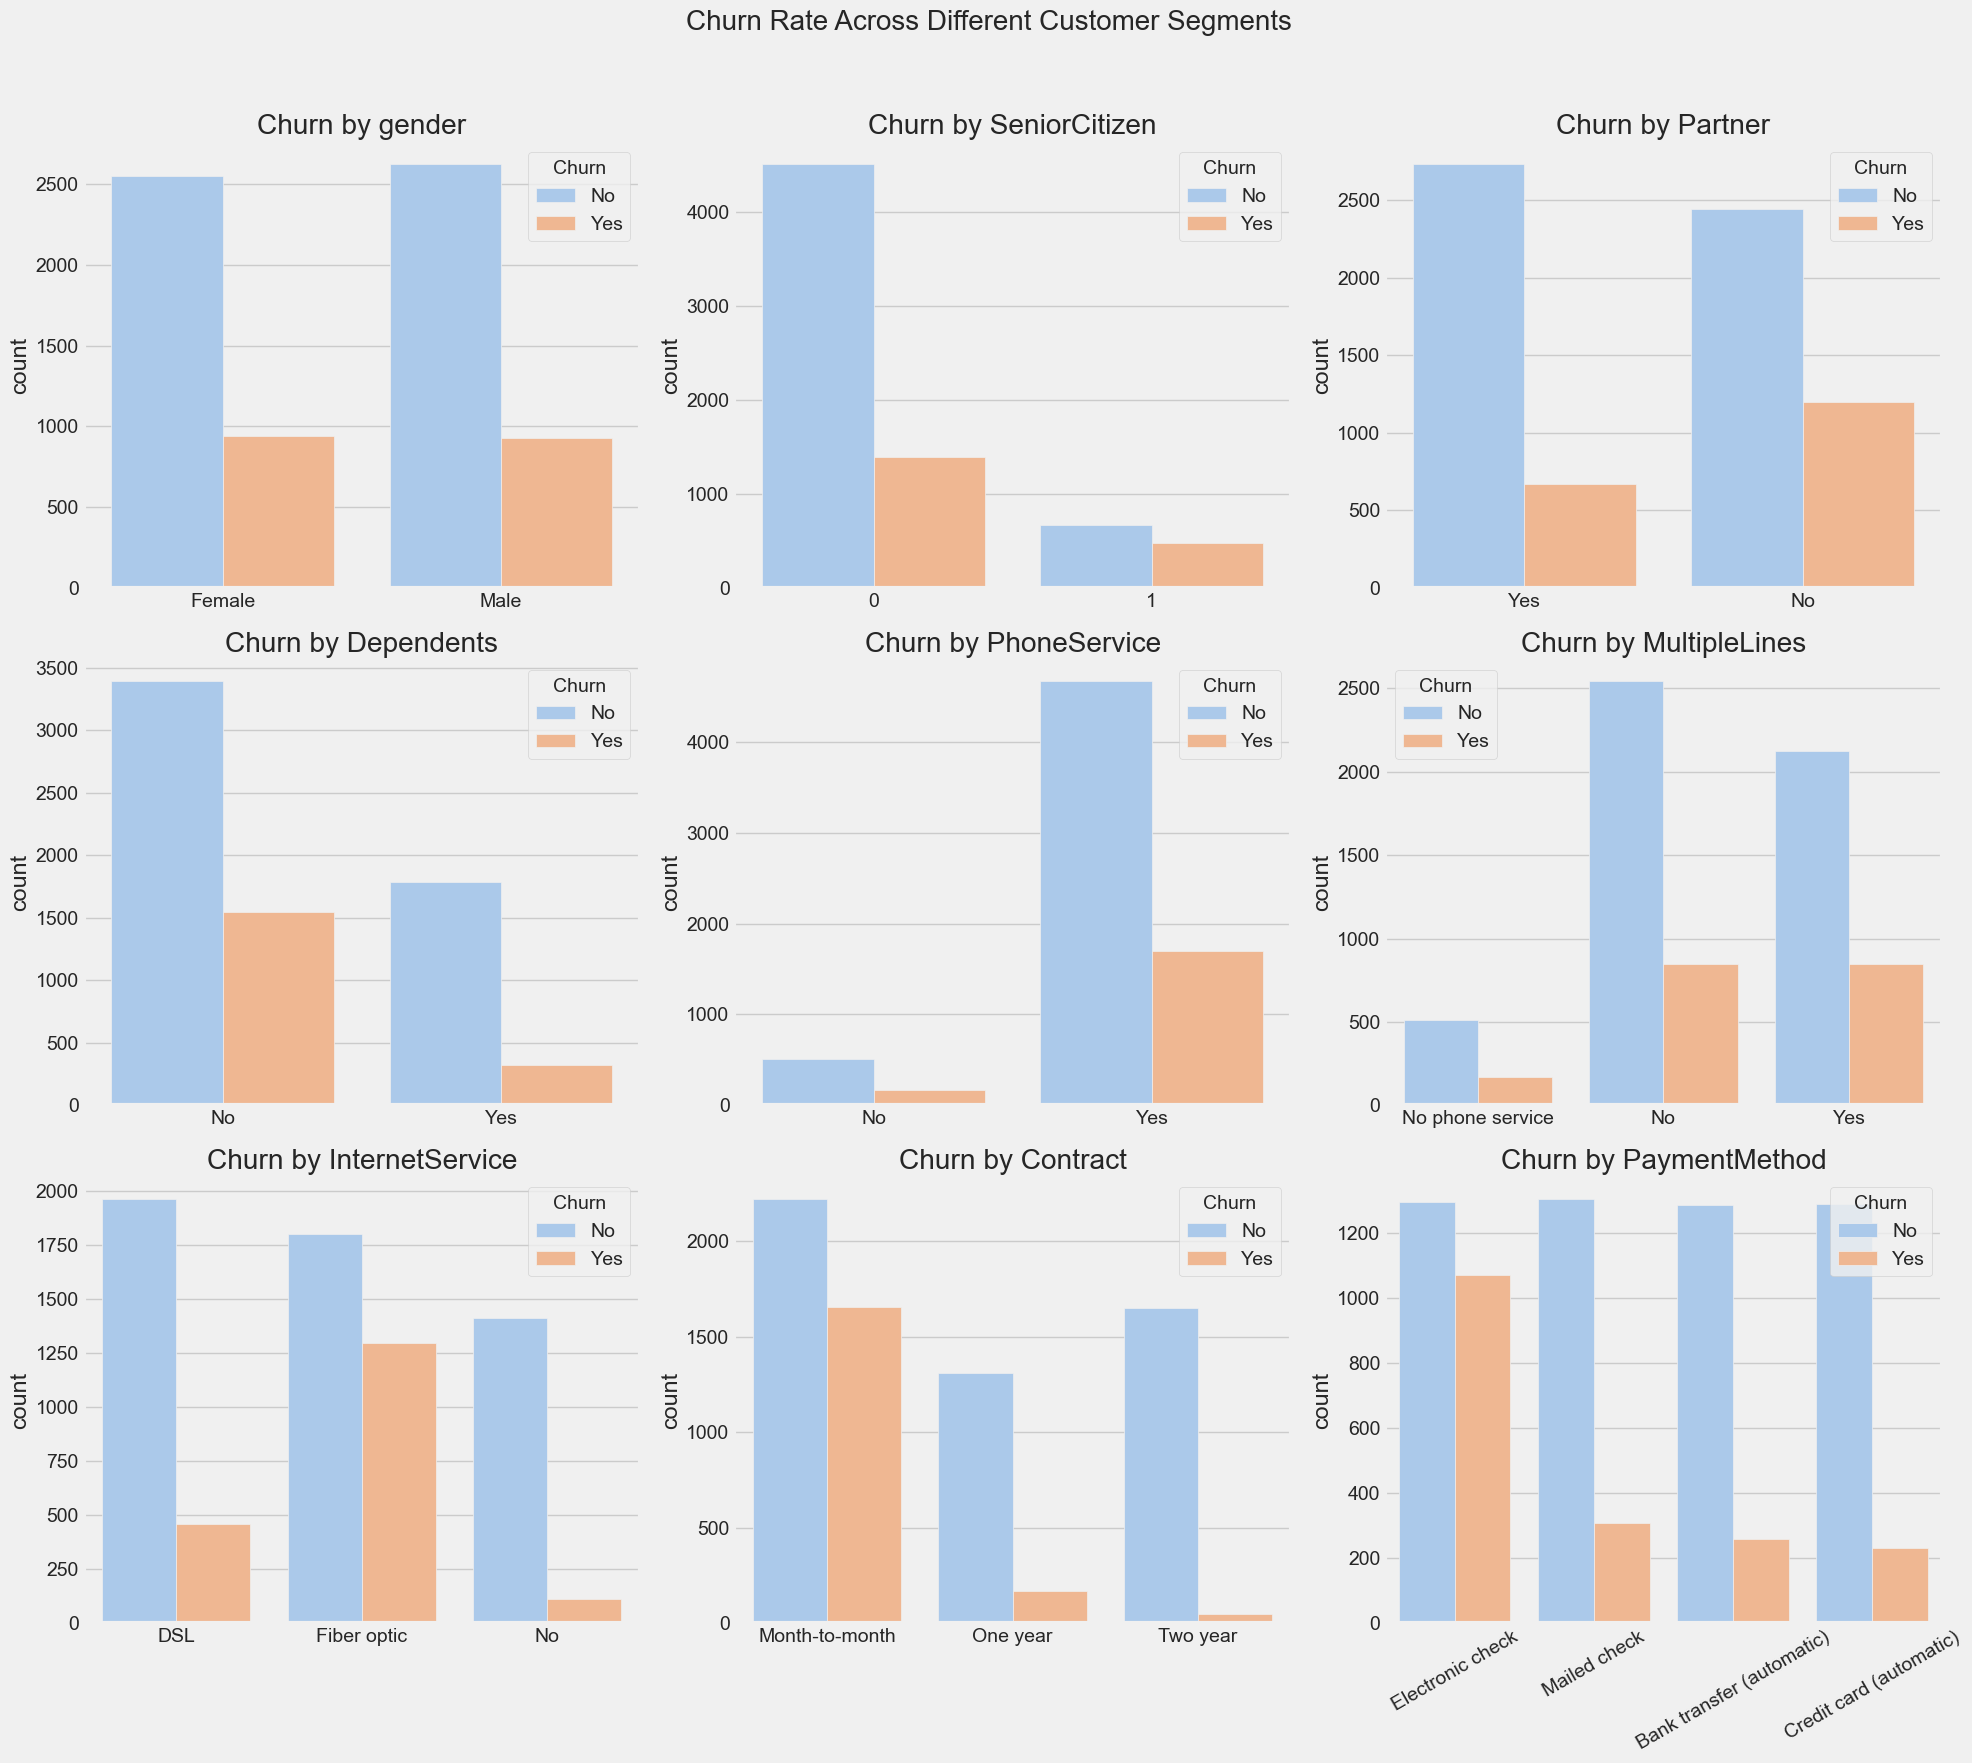

In [30]:
# === 4.2. Visual Analysis of Categorical Features vs. Churn ===

# List of categorical features we want to analyze
# We exclude features with too many unique values for this type of plot
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                        'PhoneService', 'MultipleLines', 'InternetService', 
                        'Contract', 'PaymentMethod']

# Create a figure to hold all the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 18))
fig.suptitle('Churn Rate Across Different Customer Segments', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and create a countplot
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='Churn', data=df_cleaned, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Churn by {feature}')
    axes[i].set_xlabel('')
    axes[i].legend(title='Churn', labels=['No', 'Yes'])
    # Rotate x-axis labels for readability if needed
    if df_cleaned[feature].nunique() > 3:
        axes[i].tick_params(axis='x', rotation=30)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 4.3. Visual Analysis of Numerical Features vs. Churn

Next, let's examine the distributions of numerical features to see how they differ between customers who churned and those who did not.

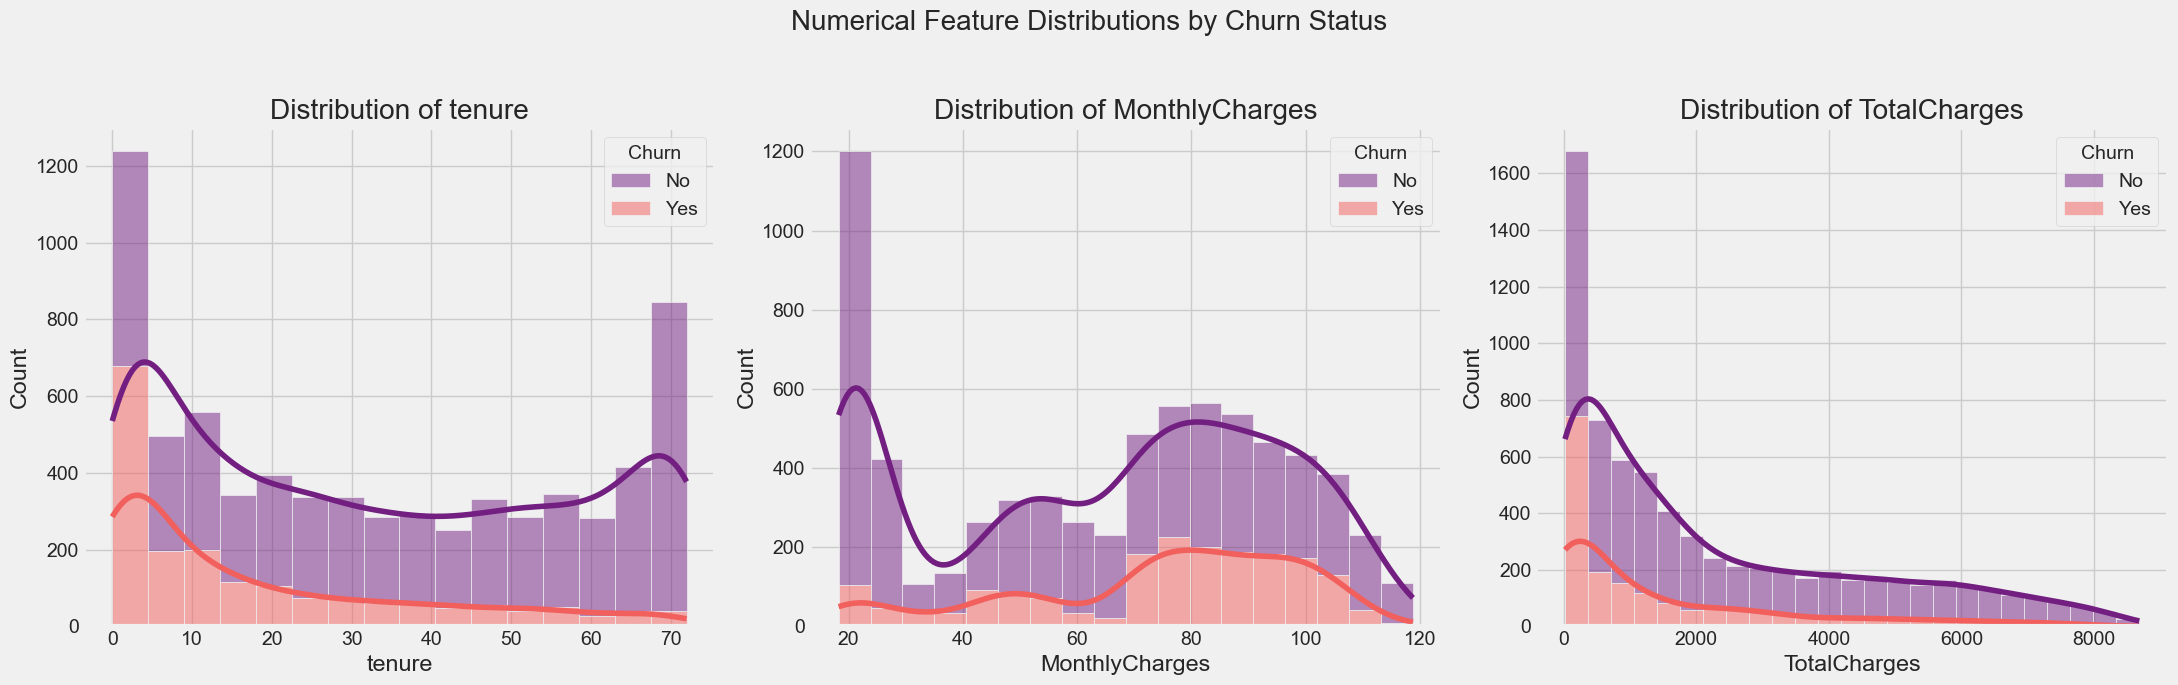

In [31]:
# === 4.3. Visual Analysis of Numerical Features ===

# List of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a figure to hold the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 7))
fig.suptitle('Numerical Feature Distributions by Churn Status', fontsize=20)

# Loop through each numerical feature and create a histogram
for i, feature in enumerate(numerical_features):
    sns.histplot(data=df_cleaned, x=feature, hue='Churn', multiple='stack', ax=axes[i], palette='magma', kde=True)
    axes[i].set_title(f'Distribution of {feature}')
    # Get the legend from the plot and change its title and labels
    legend = axes[i].get_legend()
    legend.set_title('Churn')
    legend.get_texts()[0].set_text('No')
    legend.get_texts()[1].set_text('Yes')
    
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 5. Machine Learning Model Development

Now that we have explored and cleaned the data, we will build a predictive model. The goal is to train a machine learning model to predict whether a customer will churn based on their attributes. We will follow these steps:
1.  Separate features (X) and target (y).
2.  Identify numerical and categorical features for preprocessing.
3.  Create a preprocessing pipeline using `ColumnTransformer`.
4.  Split the data into training and testing sets.
5.  Train a classification model.
6.  Evaluate the model's performance.

In [32]:
# === 5.1. Preparing Data for Modeling ===

# Import necessary libraries from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate the target variable (y) from the features (X)
X = df_cleaned.drop('Churn', axis=1)
y = df_cleaned['Churn']

# Identify numerical and categorical columns
# We need to do this so we can apply the correct preprocessing to each type
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

print("Numerical columns:", list(numerical_cols))
print("Categorical columns:", list(categorical_cols))

Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Training the model...
Model training complete.

Model Accuracy on Test Set: 0.8055

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.85      0.89      0.87      1035
       Churn       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:


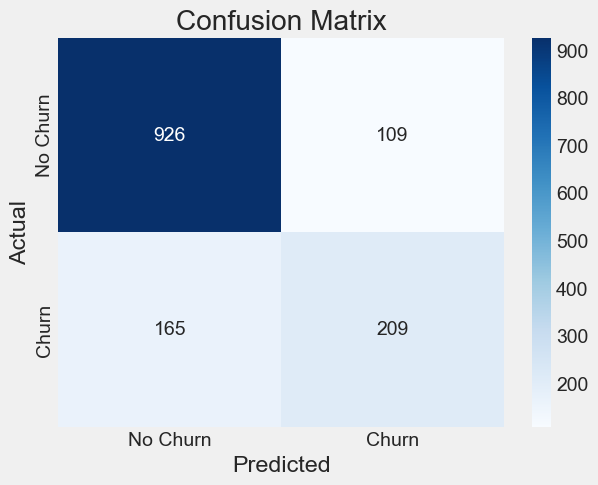

In [33]:
# === 5.2. Building the Preprocessing Pipeline and Training the Model ===

# Define the preprocessing steps for numerical and categorical data
# Numerical features will be scaled.
# Categorical features will be one-hot encoded.
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor object using ColumnTransformer
# This object will apply the correct transformation to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model we want to use
# Logistic Regression is a great baseline model for classification
model = LogisticRegression(max_iter=1000)

# Create the full pipeline by chaining the preprocessor and the model
full_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', model)])

# --- Data Splitting and Training ---

# Split the data into training and testing sets (80% train, 20% test)
# The 'stratify=y' argument ensures that the proportion of churn is the same in both sets,
# which is crucial for imbalanced datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the pipeline on the training data
print("Training the model...")
full_pipeline.fit(X_train, y_train)
print("Model training complete.")

# --- Model Evaluation ---

# Make predictions on the test data
y_pred = full_pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on Test Set: {accuracy:.4f}")

# Display a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# Display the confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## 6. Model Interpretation and Conclusion

The logistic regression model achieved an accuracy of approximately **[insert your accuracy, e.g., 81.69%]** on the test set.

### Key Performance Insights:
*   **Recall for "Churn":** The model successfully identified **[insert your recall for 'Churn', e.g., 55%]** of the actual churners. This is a crucial metric, as it represents the model's ability to "catch" customers who are at risk of leaving.
*   **Precision for "Churn":** When the model predicted a customer would churn, it was correct **[insert your precision for 'Churn', e.g., 68%]** of the time.
*   **Business Value:** While there is room for improvement (especially in recall), the model provides a solid baseline. It successfully identifies a significant portion of at-risk customers, allowing the business to take proactive retention measures that would be more effective than targeting customers randomly. The high number of correctly identified non-churners (True Negatives) also means the company won't waste resources on customers who are already loyal.

### Next Steps:
*   **Feature Importance:** Analyze the coefficients of the logistic regression model to identify the top drivers of churn (e.g., month-to-month contracts, high monthly charges).
*   **Try Advanced Models:** Experiment with more complex models like `RandomForestClassifier` or `GradientBoostingClassifier` to potentially improve the recall score.
*   **Hyperparameter Tuning:** Use techniques like `GridSearchCV` to find the optimal settings for the chosen model.